In [116]:
%matplotlib inline
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import pandas as pd
import numpy as np

from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter,crossings_nonzero_pos2neg

from scipy import signal



In [33]:
ts = GaitTimeSeries.load_data('/home/c/data/pdkit/acc/lcd-up.tsv', format_file='accapp')
gp = GaitProcessor(sampling_frequency=40.0)

rts = gp.resample_signal(ts)

In [34]:
gp.speed_of_gait(rts)

0.33768505307272734

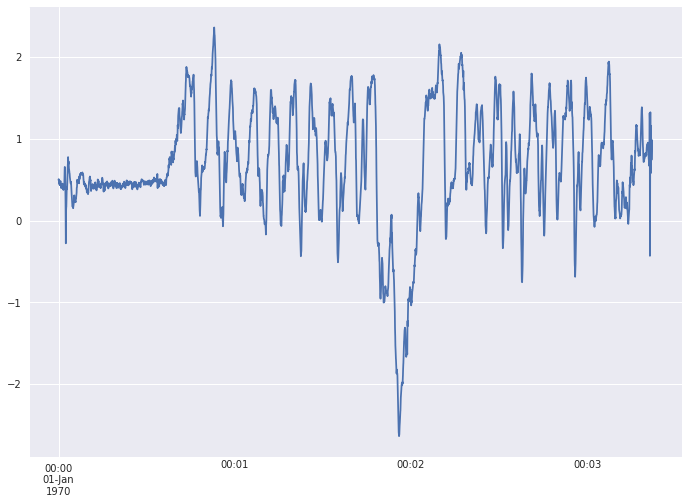

In [35]:
rts.y.plot()

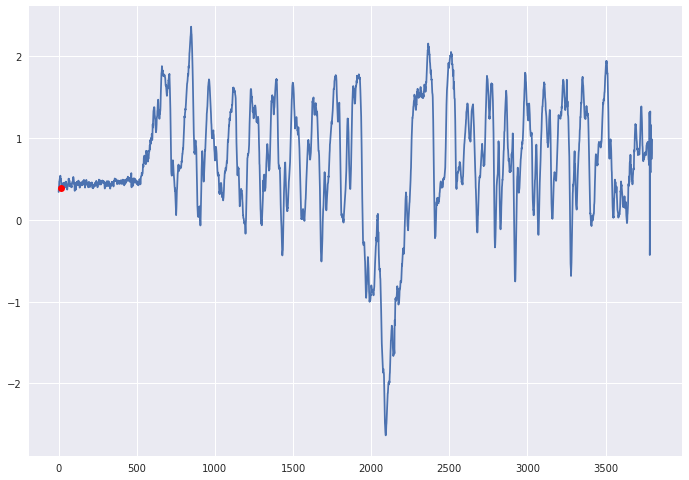

In [36]:
start,stop = gp.remove_static_signal(ts[200:], axis='x',signal_threshold=.4)
start,stop

plt.plot(ts['y'][200:].values)
plt.plot(start, ts.y[200:][start], 'ro')

In [37]:
t, i, l = gp.freeze_of_gait(ts)

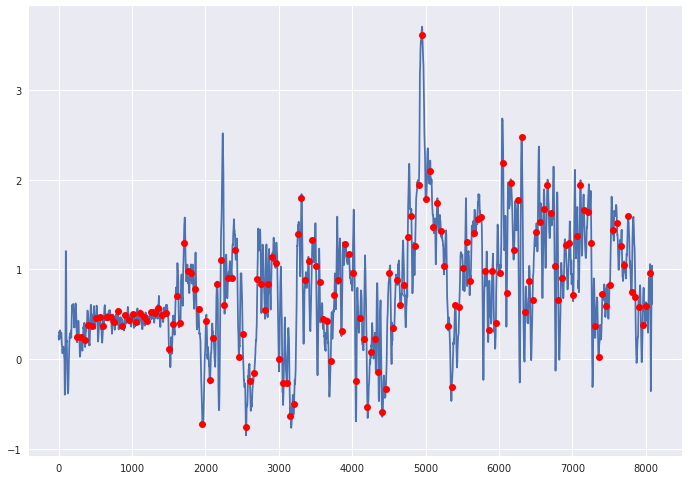

In [38]:
plt.plot(rts.x.values)
plt.plot(t, rts.x[t], 'ro')

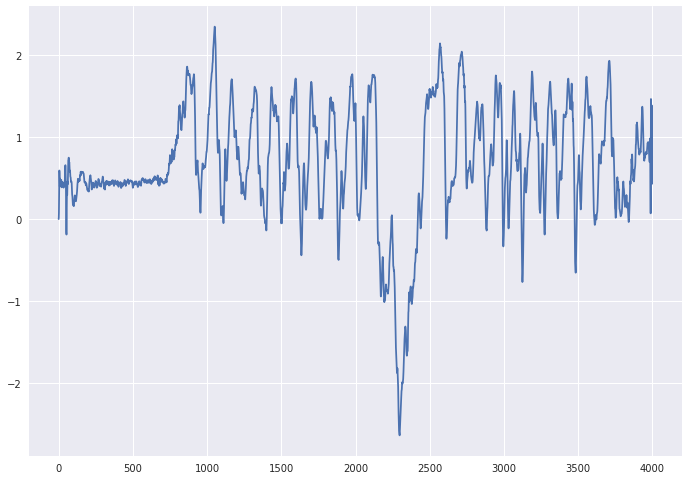

In [85]:
sig = butter_lowpass_filter(ts.y.values, sample_rate=40, cutoff=10.0, order=10)
plt.plot(sig)

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


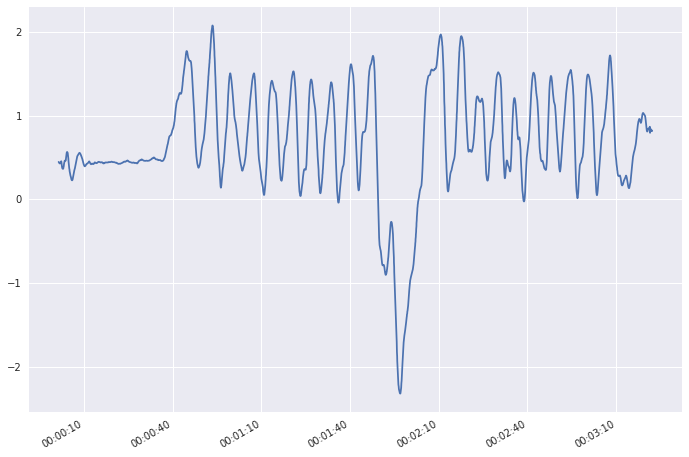

In [78]:
pd.rolling_mean(ts.y, window=30).plot()

In [90]:
def find_highest_peak(axis):
    gt = signal.argrelextrema(axis, np.greater)[0]
    lt = signal.argrelextrema(axis, np.less)[0]
    
    peaks = sorted(list(gt) + list(lt))

    top_peak = np.max(axis[peaks])
    bot_peak = np.min(axis[peaks])
    
    plt.plot(axis)
    plt.plot(np.argmax(axis[peaks]), axis[np.argmax(axis[peaks])], 'go')
    plt.plot(np.argmin(axis[peaks]), axis[np.argmin(axis[peaks])], 'ro')
    

def start_end_turn(f_sig):
    
    gt = signal.argrelextrema(f_sig, np.greater)[0]
    lt = signal.argrelextrema(f_sig, np.less)[0]
    
    peaks = sorted(list(gt) + list(lt))

    top_peak = np.argmax(f_sig[peaks])
    bot_peak = np.argmin(f_sig[peaks])
    
    if top_peak > bot_peak:
        start_turn = peaks[bot_peak - 1]
        end_turn = peaks[top_peak + 1]
    else:
        start_turn = peaks[top_peak - 1]
        end_turn = peaks[bot_peak + 1]


    plt.plot(f_sig)
    plt.plot(start_turn, f_sig[start_turn], 'go')
    plt.plot(end_turn, f_sig[end_turn], 'ro')
    
    return start_turn, end_turn

def walk_turn_times(signal, verbose=False):
    #signal = butter_lowpass_filter(data, freq, cutoff=2, order=3)
    
    start, end = start_end_turn(signal)
    
    forward = signal[:start]
    backward = signal[end:]
    turn = signal[start:end]
    
    time_f = len(forward) / freq
    time_b = len(backward) / freq
    time_t = len(turn) / freq
    
    if verbose:
        print("Time it took to walf forward: {} s".format(time_f))
        print("Time it took to turn: {} s".format(time_t))
        print("Time it took to walk backwards: {} s ".format(time_b))
    
    return time_f, time_t, time_b

def two_axis_turn_time(data, freq):
    f_y, t_y, b_y = walk_turn_times(data.y, freq)
    f_z, t_z, b_z = walk_turn_times(data.z, freq)
    
    f = np.mean([f_y, f_z])
    t = np.mean([t_y, t_z])
    b = np.mean([b_y, b_z])
    
    print("Time it took to walf forward: {} s".format(f))
    print("Time it took to turn: {} s".format(t))
    print("Time it took to walk backwards: {} s ".format(b))

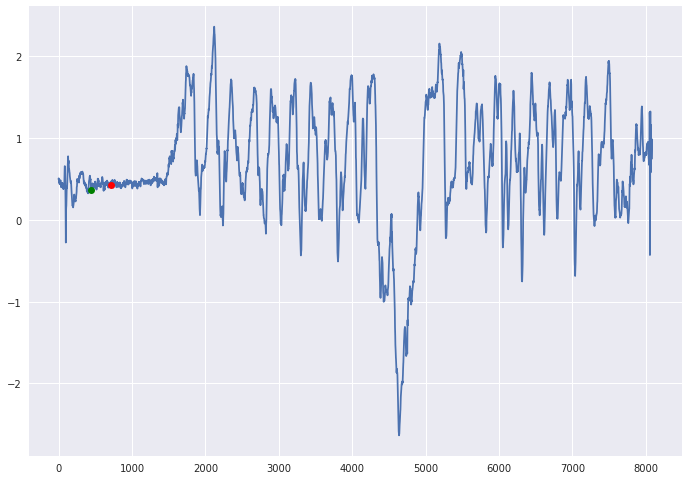

In [91]:
find_highest_peak(rts.y.values)#, verbose=1)

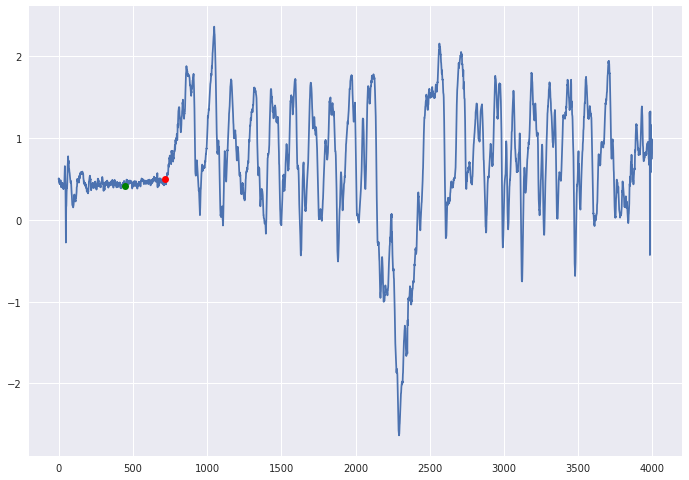

In [92]:
axis = ts.y.values

gt = signal.argrelextrema(axis, np.greater)[0]
lt = signal.argrelextrema(axis, np.less)[0]
    
peaks = sorted(list(gt) + list(lt))

top_peak = np.max(axis[peaks])
bot_peak = np.min(axis[peaks])

plt.plot(axis)
plt.plot(np.argmax(axis[peaks]), axis[np.argmax(axis[peaks])], 'go')
plt.plot(np.argmin(axis[peaks]), axis[np.argmin(axis[peaks])], 'ro')

In [105]:
turn_peak = np.argmax(np.abs(ts.y.values))

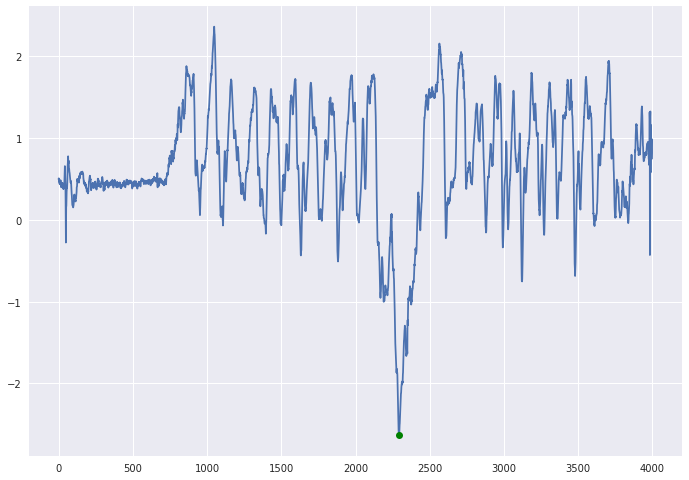

In [106]:
plt.plot(axis)
plt.plot(turn_peak, axis[turn_peak], 'go')

In [117]:
zero_crossings = np.where(np.diff(np.sign(axis)))[0]
zero_crossings

array([  47,   49, 1104, 1108, 1385, 1399, 1494, 1497, 1498, 1501, 1623,
       1638, 1771, 1773, 1875, 1890, 2019, 2021, 2022, 2023, 2144, 2239,
       2243, 2416, 2431, 2439, 2605, 2614, 2874, 2882, 2988, 2997, 3025,
       3031, 3114, 3128, 3266, 3274, 3472, 3486, 3605, 3613, 3617, 3618,
       3834, 3839, 3982, 3984])

In [118]:
zc = crossings_nonzero_pos2neg(axis)

In [119]:
zc

array([  47, 1104, 1385, 1494, 1623, 1771, 1875, 2019, 2022, 2144, 2243,
       2431, 2605, 2874, 2988, 3025, 3114, 3266, 3472, 3605, 3617, 3834,
       3982])

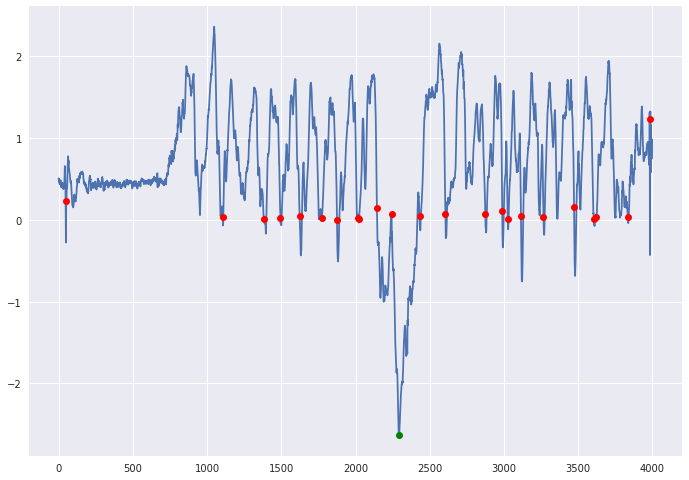

In [120]:
plt.plot(axis)
plt.plot(turn_peak, axis[turn_peak], 'go')
plt.plot(zc, axis[zc], 'ro')

In [126]:
start = zc[zc < turn_peak][-1]
end = zc[zc > turn_peak][0]

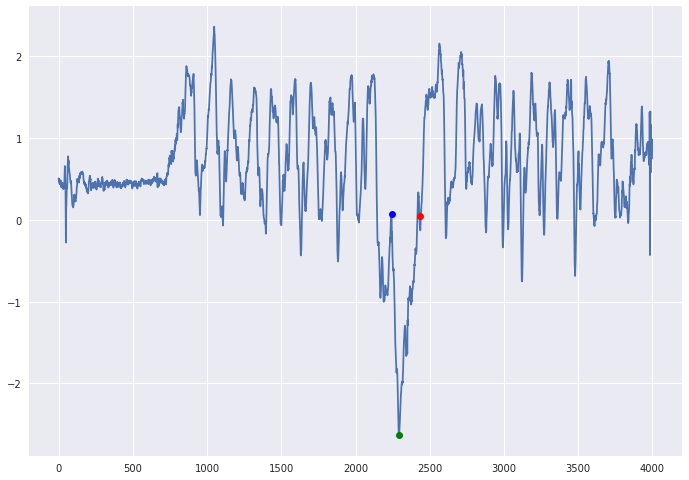

In [130]:
plt.plot(axis)
plt.plot(turn_peak, axis[turn_peak], 'go')
#plt.plot(zc, axis[zc], 'ro')
plt.plot(start, axis[start], 'bo')
plt.plot(end, axis[end], 'ro')

This is find up to this point but we still need the following:
    - calculate the time between zero crossings 
    - if this time is less than a thresh use previous peak as start or end turn_peak
    - calculate the time between start and end